# Phase 1 Project: Aircraft Risk Identification

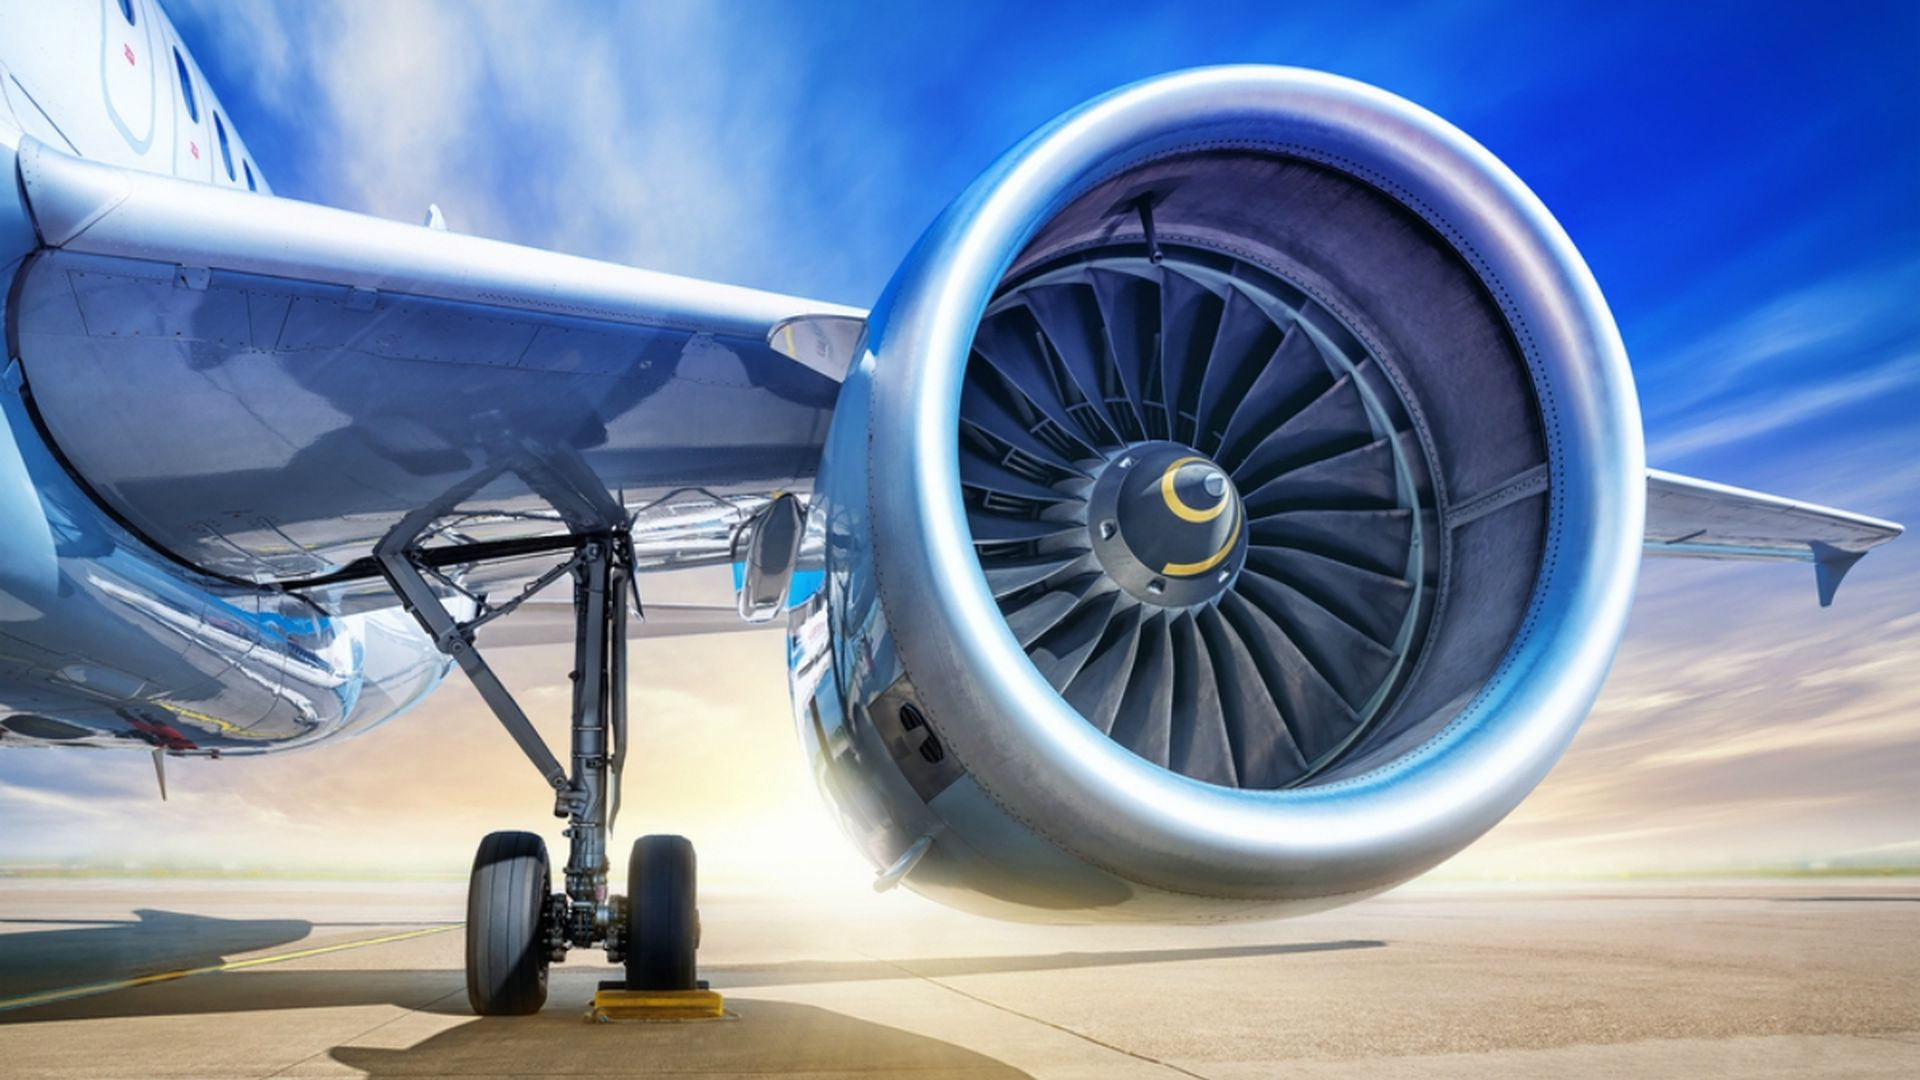

## Introduction

In a time of business expansion companies are driven to diversify by exploring industries. One such opportunity involves entering the aviation sector by
acquiring and operating aircraft, for both private use. This endeavor requires an understanding of the risks associated with aircraft models.
As the assigned analyst the main objective is to navigate through years of aviation accident data ranging from 1962 to 2023 obtained from the National
Transportation Safety Board.
By cleaning analyzing and visualizing this data the goal is to uncover insights that will assist in choosing aircraft with the least risk, for the companys new aviation venture.


## Business Understanding

During a period of business growth companies often seek to expand their horizons by venturing into industries. One promising opportunity involves
entering the aviation field through the acquisition and operation of aircraft. This venture requires an understanding of the risks associated with various aircraft models. This will be achieved by identifying low risk aircraft models through:

- Examining the number of injuries and fatalities associated with each model
- Evaluating the impact of aircraft damage severity
- Assessing the influence of weather conditions
- Analyzing the phase of flight risk
- Correlating engine number and type with safety

## Data Understanding

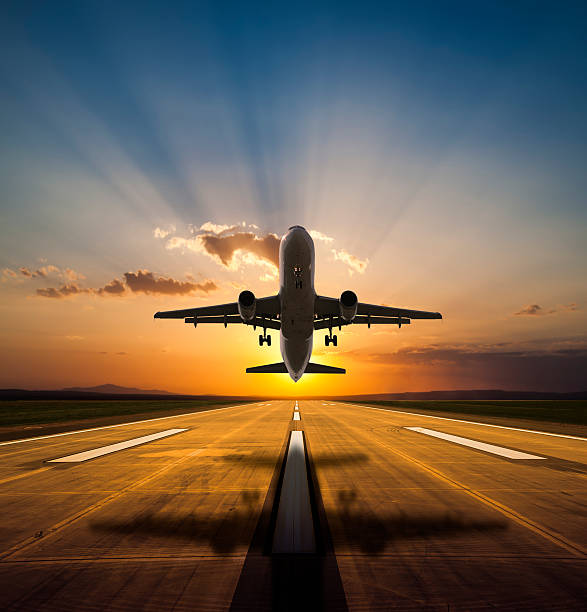

The NTSB aviation accident database contains information from 1948 to 2022 about civil aviation accidents and selected incidents within the United
States, its territories and possessions, and in international waters.
It has two datasets named Aviation Data and USState Codes.
The Aviation dataset has values of aircraft with a unique ID drawn from the event ID column. The data files provide the dates and location of each event, as well as other aircraft characteristics such as aircraft make, model, type and number of engines and so many more.
The USState Cosed dataset provides more information on the aviation dataset as it contains data about a state and the abbreviation indicated in the Aviation dataset.
The data types found in these datasets are of continous and categorical nature.

## Reading and Checking the Data

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
file_path = 'C:/Users/Claude/Desktop/Moringa/Phase1/Phase1_Project/Aviation_Project/data/AviationData.csv'

aviation_data_df = pd.read_csv(file_path, encoding='latin-1')

#Accessing the first 5 rows
aviation_data_df.head()

C:\Users\Claude\AppData\Local\Temp\ipykernel_12748\1345689928.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data_df = pd.read_csv(file_path, encoding='latin-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
file2_path = 'C:/Users/Claude/Desktop/Moringa/Phase1/Phase1_Project/Aviation_Project/data/USState_Codes.csv'

state_codes_df = pd.read_csv(file2_path, encoding='latin-1')
state_codes_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


## Data Preparation

Analysis starts by pre-processing data. The first and most initial step is to check all the details about the dataset that were not shown when the first few rows were displayed.

In [4]:
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

The information above sheds some light on the fact that there are 88889 rows and 31 columns. The entries are of float and object data type. There is a handful of missing values whose magnitude shall be investigated in the succeeding cell.

In [5]:
aviation_data_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

From the information relayed above, it seems like only 4 columns: `Event.Id`, `Investigation.Type`, `Accident.Number` and `Event.Date`: have all the values in place. All the other column have missing values whose tally is indicated by the numbers alongside the column names.
This might be alarming at first but upon further inspection it is realised that not all 31 columns are need for the analysis. The monster shall be slayed first by picking the features that are of interest to the analysis.

In [6]:
# Filtering important features
features_of_interest = ['Event.Id', 'Event.Date', 'Location', 'Make', 'Model', 'Aircraft.damage', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Weather.Condition', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Broad.phase.of.flight']

# Creating a copy of the dataset with the selected features
aviation_data_df1 = aviation_data_df[features_of_interest]
aviation_data_df1.head()

,Event.Id,Event.Date,Location,Make,Model,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Stinson,108-3,Destroyed,No,1.0,Reciprocating,UNK,2.0,0.0,0.0,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Destroyed,No,1.0,Reciprocating,UNK,4.0,0.0,0.0,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna,172M,Destroyed,No,1.0,Reciprocating,IMC,3.0,NaN,NaN,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Rockwell,112,Destroyed,No,1.0,Reciprocating,IMC,2.0,0.0,0.0,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Cessna,501,Destroyed,No,NaN,NaN,VMC,1.0,2.0,NaN,Approach


Now that the relevant columns have been hand picked, there are details regading the new dataset that needs inspection.

In [7]:
aviation_data_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Make                    88826 non-null  object 
 4   Model                   88797 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Amateur.Built           88787 non-null  object 
 7   Number.of.Engines       82805 non-null  float64
 8   Engine.Type             81793 non-null  object 
 9   Weather.Condition       84397 non-null  object 
 10  Total.Fatal.Injuries    77488 non-null  float64
 11  Total.Serious.Injuries  76379 non-null  float64
 12  Total.Minor.Injuries    76956 non-null  float64
 13  Broad.phase.of.flight   61724 non-null  object 
dtypes: float64(4), object(10)
memory usage

In [8]:
aviation_data_df1.isnull().sum()

Event.Id                      0
Event.Date                    0
Location                     52
Make                         63
Model                        92
Aircraft.damage            3194
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Weather.Condition          4492
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Broad.phase.of.flight     27165
dtype: int64

Well, it seems like there is no escaping missing values after all. How can the missing vaues be handled?

First, a small reminder of how the datset looks like.

aviation_data_df1.head()

So as to maintain the integrity of the dataset, replacing the missing values with `Unknown` for categorical data and `-99` as the placeholder for continous data strategy is used.
Reason being the missing values are too many to drop which may lead to loosing a good chunk of the datset.                                                                                                                                            

In [10]:
# Replacing missing values with 'Unknown' for categorical data
missing_columns = ['Location', 'Make', 'Model', 'Aircraft.damage', 'Amateur.Built', 'Engine.Type', 'Weather.Condition', 'Broad.phase.of.flight']

for column in missing_columns:
    aviation_data_df1[column].replace(np.nan, 'Unknown', inplace = True)


# Filling NaNs with -99 as the placeholder for continous data
aviation_data_df1['Number.of.Engines'].replace(np.nan, -99, inplace = True)
aviation_data_df1['Total.Fatal.Injuries'].replace(np.nan, -99, inplace = True)
aviation_data_df1['Total.Serious.Injuries'].replace(np.nan, -99, inplace = True)
aviation_data_df1['Total.Minor.Injuries'].replace(np.nan, -99, inplace = True)

C:\Users\Claude\AppData\Local\Temp\ipykernel_12748\1732969572.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aviation_data_df1[column].replace(np.nan, 'Unknown', inplace = True)
C:\Users\Claude\AppData\Local\Temp\ipykernel_12748\1732969572.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_df1[column].replace(np.nan, 'Unkno

In [11]:
aviation_data_df1.head()

,Event.Id,Event.Date,Location,Make,Model,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Stinson,108-3,Destroyed,No,1.0,Reciprocating,UNK,2.0,0.0,0.0,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Destroyed,No,1.0,Reciprocating,UNK,4.0,0.0,0.0,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna,172M,Destroyed,No,1.0,Reciprocating,IMC,3.0,-99.0,-99.0,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Rockwell,112,Destroyed,No,1.0,Reciprocating,IMC,2.0,0.0,0.0,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Cessna,501,Destroyed,No,-99.0,Unknown,VMC,1.0,2.0,-99.0,Approach


Another pre-processing step that is conducted is feature engineering which is achieved by combining the `Make` and `Model` columns to form one column called `Aircraft.Type`. A new dataset which is a coppy of the previous one is then generated to accommodate the new changes.

In [12]:
# Merging 'Make' and 'Model' into one feature 'Aircraft.Type
aviation_data_df1['Aircraft.Type'] = aviation_data_df1.apply(lambda row: f"{row['Make']} {row['Model']}", axis=1)

# Dropping the original 'Make' and 'Model' columns
aviation_data_df1.drop(columns=['Make', 'Model'], inplace = True)

# Reordering columns to place 'Aircraft.Type' as the 4th column
columns_reordered = ['Event.Id', 'Event.Date', 'Location', 'Aircraft.Type', 'Aircraft.damage', 'Amateur.Built', 'Number.of.Engines','Engine.Type', 'Weather.Condition', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Broad.phase.of.flight']
aviation_data_df2 = aviation_data_df1[columns_reordered]

C:\Users\Claude\AppData\Local\Temp\ipykernel_12748\229328786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_df1['Aircraft.Type'] = aviation_data_df1.apply(lambda row: f"{row['Make']} {row['Model']}", axis=1)
C:\Users\Claude\AppData\Local\Temp\ipykernel_12748\229328786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_df1.drop(columns=['Make', 'Model'], inplace = True)


In [13]:
aviation_data_df2.head()

,Event.Id,Event.Date,Location,Aircraft.Type,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Stinson 108-3,Destroyed,No,1.0,Reciprocating,UNK,2.0,0.0,0.0,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Piper PA24-180,Destroyed,No,1.0,Reciprocating,UNK,4.0,0.0,0.0,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna 172M,Destroyed,No,1.0,Reciprocating,IMC,3.0,-99.0,-99.0,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Rockwell 112,Destroyed,No,1.0,Reciprocating,IMC,2.0,0.0,0.0,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Cessna 501,Destroyed,No,-99.0,Unknown,VMC,1.0,2.0,-99.0,Approach


Seems like everything is now in order, right? Not so fast!
The `Weather.Condition` column has two values spelt differently but mean the same thing. This is the `UNK` and `Unk`. The `.replace()` method is used to correct this oversight.

In [14]:
# Replacing 'UNK' and 'Unk' with 'Unknown' in the 'Weather.Condition' column
aviation_data_df2['Weather.Condition'] = aviation_data_df['Weather.Condition'].replace(['UNK', 'Unk'], 'Unknown')
aviation_data_df2

,Event.Id,Event.Date,Location,Aircraft.Type,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Stinson 108-3,Destroyed,No,1.0,Reciprocating,Unknown,2.0,0.0,0.0,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Piper PA24-180,Destroyed,No,1.0,Reciprocating,Unknown,4.0,0.0,0.0,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna 172M,Destroyed,No,1.0,Reciprocating,IMC,3.0,-99.0,-99.0,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Rockwell 112,Destroyed,No,1.0,Reciprocating,IMC,2.0,0.0,0.0,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Cessna 501,Destroyed,No,-99.0,Unknown,VMC,1.0,2.0,-99.0,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,"Annapolis, MD",PIPER PA-28-151,Unknown,No,-99.0,Unknown,NaN,0.0,1.0,0.0,Unknown
88885,20221227106494,2022-12-26,"Hampton, NH",BELLANCA 7ECA,Unknown,No,-99.0,Unknown,NaN,0.0,0.0,0.0,Unknown
88886,20221227106497,2022-12-26,"Payson, AZ",AMERICAN CHAMPION AIRCRAFT 8GCBC,Substantial,No,1.0,Unknown,VMC,0.0,0.0,0.0,Unknown
88887,20221227106498,2022-12-26,"Morgan, UT",CESSNA 210N,Unknown,No,-99.0,Unknown,NaN,0.0,0.0,0.0,Unknown


In [15]:
aviation_data_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88889 non-null  object 
 3   Aircraft.Type           88889 non-null  object 
 4   Aircraft.damage         88889 non-null  object 
 5   Amateur.Built           88889 non-null  object 
 6   Number.of.Engines       88889 non-null  float64
 7   Engine.Type             88889 non-null  object 
 8   Weather.Condition       84397 non-null  object 
 9   Total.Fatal.Injuries    88889 non-null  float64
 10  Total.Serious.Injuries  88889 non-null  float64
 11  Total.Minor.Injuries    88889 non-null  float64
 12  Broad.phase.of.flight   88889 non-null  object 
dtypes: float64(4), object(9)
memory usage: 8.8+ MB


Every missing record has been replaced with the appropriate value apart from the `Weather.Condition` column, AGAIN!. To solve this, the `Nan` records, which mean missing values, are replaced with `Unknown` permanently using the `.fillna(inplace=True)` method.

In [16]:
aviation_data_df2['Weather.Condition'].fillna('Unknown', inplace=True)
aviation_data_df2.tail()

C:\Users\Claude\AppData\Local\Temp\ipykernel_12748\4221862904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aviation_data_df2['Weather.Condition'].fillna('Unknown', inplace=True)


,Event.Id,Event.Date,Location,Aircraft.Type,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
88884,20221227106491,2022-12-26,"Annapolis, MD",PIPER PA-28-151,Unknown,No,-99.0,Unknown,Unknown,0.0,1.0,0.0,Unknown
88885,20221227106494,2022-12-26,"Hampton, NH",BELLANCA 7ECA,Unknown,No,-99.0,Unknown,Unknown,0.0,0.0,0.0,Unknown
88886,20221227106497,2022-12-26,"Payson, AZ",AMERICAN CHAMPION AIRCRAFT 8GCBC,Substantial,No,1.0,Unknown,VMC,0.0,0.0,0.0,Unknown
88887,20221227106498,2022-12-26,"Morgan, UT",CESSNA 210N,Unknown,No,-99.0,Unknown,Unknown,0.0,0.0,0.0,Unknown
88888,20221230106513,2022-12-29,"Athens, GA",PIPER PA-24-260,Unknown,No,-99.0,Unknown,Unknown,0.0,1.0,0.0,Unknown


And now to justify that everything is in check, the `.info()` method is ran. This assertains that there are no missing values in our preferred dataset.

In [17]:
aviation_data_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88889 non-null  object 
 3   Aircraft.Type           88889 non-null  object 
 4   Aircraft.damage         88889 non-null  object 
 5   Amateur.Built           88889 non-null  object 
 6   Number.of.Engines       88889 non-null  float64
 7   Engine.Type             88889 non-null  object 
 8   Weather.Condition       88889 non-null  object 
 9   Total.Fatal.Injuries    88889 non-null  float64
 10  Total.Serious.Injuries  88889 non-null  float64
 11  Total.Minor.Injuries    88889 non-null  float64
 12  Broad.phase.of.flight   88889 non-null  object 
dtypes: float64(4), object(9)
memory usage: 8.8+ MB


In [19]:
# Checking that the dataset is as we want it
aviation_data_df2.head()

,Event.Id,Event.Date,Location,Aircraft.Type,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Stinson 108-3,Destroyed,No,1.0,Reciprocating,Unknown,2.0,0.0,0.0,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Piper PA24-180,Destroyed,No,1.0,Reciprocating,Unknown,4.0,0.0,0.0,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna 172M,Destroyed,No,1.0,Reciprocating,IMC,3.0,-99.0,-99.0,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Rockwell 112,Destroyed,No,1.0,Reciprocating,IMC,2.0,0.0,0.0,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Cessna 501,Destroyed,No,-99.0,Unknown,VMC,1.0,2.0,-99.0,Approach


The clean dataset is saved for smooth transition to the next step

In [20]:
# Save the cleaned dataset to a new CSV file
aviation_data_df2.to_csv(r'C:\Users\Claude\Desktop\Moringa\Phase1\Phase1_Project\Aviation_Project\data\Aviation_Data_Cleaned.csv', index=False)

## Data Analysis

In [ ]:
file_path = 'C:/Users/Claude/Desktop/Moringa/Phase1/Phase1_Project/Aviation_Project/data/Aviation_Data_Cleaned.csv'

aviation_data_clean = pd.read_csv(file_path, encoding='latin-1')
aviation_data_clean.tail()

### Aircraft Type and Injuries

In [ ]:
# Calculate average fatal injuries per aircraft model
avg_fatal = aviation_data_clean.groupby('Aircraft.Type')['Total.Fatal.Injuries'].mean()
avg_fatal

In [ ]:
avg_serious = aviation_data_clean.groupby('Aircraft.Type')['Total.Serious.Injuries'].mean()
avg_serious

In [ ]:
avg_minor = aviation_data_clean.groupby('Aircraft.Type')['Total.Minor.Injuries'].mean()
avg_minor

In [ ]:
# Group the data by aircraft type and calculate the mean for each type
avg_fatal = aviation_data_clean.groupby('Aircraft.Type')['Total.Fatal.Injuries'].mean()
avg_serious = aviation_data_clean.groupby('Aircraft.Type')['Total.Serious.Injuries'].mean()
avg_minor = aviation_data_clean.groupby('Aircraft.Type')['Total.Minor.Injuries'].mean()

# Combine the averages into a single DataFrame
avg_injuries = pd.DataFrame({
    'Average Fatal': avg_fatal, 
    'Average Serious': avg_serious, 
    'Average Minor': avg_minor
}).reset_index()

# Sorting the DataFrame by 'Average Fatal'
avg_injuries_sorted = avg_injuries.sort_values(by=['Average Fatal', 'Average Serious', 'Average Minor'])

# Filter out rows with non-negative average injuries
avg_injuries_sorted_non_negative = avg_injuries_sorted[(avg_injuries_sorted[['Average Fatal', 'Average Serious', 'Average Minor']] >= 0).all(axis=1)]

# Select 10 from the top and 10 from the bottom
top_10_injuries = avg_injuries_sorted_non_negative.head(10)
top_10_injuries

In [ ]:
bottom_10_injuries = avg_injuries_sorted_non_negative.tail(10)
bottom_10_injuries

In [ ]:
# Plot top 10
plt.figure(figsize=(10, 6))
plt.barh(top_10_injuries['Aircraft.Type'], top_10_injuries['Average Fatal'], color='red', label='Average Fatal')
plt.barh(top_10_injuries['Aircraft.Type'], top_10_injuries['Average Serious'], left=top_10_injuries['Average Fatal'], color='orange', label='Average Serious')
plt.barh(top_10_injuries['Aircraft.Type'], top_10_injuries['Average Minor'], left=top_10_injuries['Average Fatal'] + top_10_injuries['Average Serious'], color='green', label='Average Minor')
plt.xlabel('Average Injuries')
plt.ylabel('Aircraft Type')
plt.title('Top 10 Aircraft Types by Average Injuries')
plt.legend()
plt.grid(axis='x')
plt.show()

# Plot bottom 10
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_injuries['Aircraft.Type'], bottom_10_injuries['Average Fatal'], color='red', label='Average Fatal')
plt.barh(bottom_10_injuries['Aircraft.Type'], bottom_10_injuries['Average Serious'], left=bottom_10_injuries['Average Fatal'], color='orange', label='Average Serious')
plt.barh(bottom_10_injuries['Aircraft.Type'], bottom_10_injuries['Average Minor'], left=bottom_10_injuries['Average Fatal'] + bottom_10_injuries['Average Serious'], color='green', label='Average Minor')
plt.xlabel('Average Injuries')
plt.ylabel('Aircraft Type')
plt.title('Bottom 10 Aircraft Types by Average Injuries')
plt.legend()
plt.grid(axis='x')
plt.show()

## Aircraft Type and Damage

In [ ]:
# Get the value counts for 'Aircraft.Type' and select the top 20 aircraft types
top_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().head(10).index.tolist()
bottom_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().tail(10).index.tolist()

# Filter the dataset to include only the top 20 aircraft types
top_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(top_10_aircraft_types)]
bottom_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(bottom_10_aircraft_types)]

# Concatenate the top 10 and bottom 10 data
combined_data = pd.concat([top_10_data, bottom_10_data])
combined_data

In [ ]:
# Plotting the relationship between aircraft type and weather conditions
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_data, x='Aircraft.Type', hue='Aircraft.damage', palette='magma')
plt.title('Relationship between Aircraft Type and Weather Conditions')
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Weather Condition')
plt.tight_layout()
plt.show()

## Aircraft type and Weather condition

In [ ]:
aviation_data_clean['Weather.Condition'].value_counts()

In [ ]:
# Get the top 10 and bottom 10 aircraft types based on occurrence counts
top_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().head(10).index.tolist()
bottom_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().tail(10).index.tolist()

# Filter the dataset to include only the top 10 and bottom 10 aircraft types
top_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(top_10_aircraft_types)]
bottom_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(bottom_10_aircraft_types)]

# Concatenate the top 10 and bottom 10 data
combined_data = pd.concat([top_10_data, bottom_10_data])
combined_data

In [ ]:
# Plotting the relationship between aircraft type and weather conditions
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_data, x='Aircraft.Type', hue='Weather.Condition', palette='magma')
plt.title('Relationship between Aircraft Type and Weather Conditions')
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Weather Condition')
plt.tight_layout()
plt.show()


In [ ]:
# Get the top 10 and bottom 10 aircraft types based on occurrence counts
top_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().head(10).index.tolist()
bottom_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().tail(10).index.tolist()

# Filter the dataset to include only the top 10 and bottom 10 aircraft types
top_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(top_10_aircraft_types)]
bottom_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(bottom_10_aircraft_types)]

# Concatenate the top 10 and bottom 10 data
combined_data = pd.concat([top_10_data, bottom_10_data])

# Plotting the relationship between aircraft type and weather conditions as a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_data, x='Aircraft.Type', y='Weather.Condition', hue='Weather.Condition', palette='magma')
plt.title('Relationship between Aircraft Type and Weather Conditions')
plt.xlabel('Aircraft Type')
plt.ylabel('Weather Condition')
plt.xticks(rotation=90)
plt.legend(title='Weather Condition')
plt.tight_layout()
plt.show()

## Aircraft Type and Engine Type

In [ ]:
aviation_data_clean['Engine.Type'].value_counts()
aviation_data_clean['Engine.Type'].unique()

In [ ]:
# Get the top 10 aircraft types based on occurrence counts
top_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().head(30).index.tolist()

# Filter the dataset to include only the top 10 aircraft types
top_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(top_10_aircraft_types)]

# Create a crosstab to show the frequency of each engine type for every top aircraft type
engine_type_freq = pd.crosstab(top_10_data['Aircraft.Type'], top_10_data['Engine.Type'])

# Plotting the stacked bar chart
engine_type_freq.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='cividis')
plt.title('Frequency Distribution of Engine Types for Top 10 Aircraft Types')
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()

## Aircraft type and number of engines

In [ ]:
aviation_data_clean['Number.of.Engines'].value_counts()
aviation_data_clean['Number.of.Engines'].unique()

In [ ]:
# Get the top 10 and bottom 10 aircraft types based on occurrence counts
top_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().head(10).index.tolist()
bottom_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().tail(10).index.tolist()

# Filter the dataset to include only the top 10 and bottom 10 aircraft types
top_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(top_10_aircraft_types)]
bottom_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(bottom_10_aircraft_types)]

# Concatenate the top 10 and bottom 10 data
combined_data = pd.concat([top_10_data, bottom_10_data])
combined_data

bottom_10_data

In [ ]:
# Plotting the relationship between aircraft type and number of engines
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_data, x='Aircraft.Type', hue='Number.of.Engines', palette='viridis')
plt.title('Relationship between Aircraft Type and Number of Engines')
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Number of Engines')
plt.ylim(0, combined_data['Aircraft.Type'].value_counts().max() + 10)  # Ensure the plot starts at 0 and add some padding
plt.tight_layout()
plt.show()

## Aircraft Type and Broad Phase of Flight

In [ ]:
# Get the top 10 and bottom 10 aircraft types based on occurrence counts
top_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().head(10).index.tolist()
bottom_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().tail(10).index.tolist()

# Filter the dataset to include only the top 10 and bottom 10 aircraft types
top_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(top_10_aircraft_types)]
bottom_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(bottom_10_aircraft_types)]

# Concatenate the top 10 and bottom 10 data
combined_data = pd.concat([top_10_data, bottom_10_data])

# Plotting the relationship between aircraft type and broad phase of flight
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_data, x='Aircraft.Type', hue='Broad.phase.of.flight', palette='Paired')
plt.title('Relationship between Aircraft Type and Broad Phase of Flight')
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Broad Phase of Flight')
plt.tight_layout()
plt.show()


In [ ]:
# Get the top 10 and bottom 10 aircraft types based on occurrence counts
top_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().head(10).index.tolist()
bottom_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().tail(10).index.tolist()

# Filter the dataset to include only the top 10 and bottom 10 aircraft types
top_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(top_10_aircraft_types)]
bottom_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(bottom_10_aircraft_types)]

# Concatenate the top 10 and bottom 10 data
combined_data = pd.concat([top_10_data, bottom_10_data])

# Create a crosstab to show the frequency of each value of "Broad Phase of Flight" for every "Aircraft.Type"
broad_phase_freq = pd.crosstab(combined_data['Aircraft.Type'], combined_data['Broad.phase.of.flight'])
broad_phase_freq

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(broad_phase_freq, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Frequency of Broad Phase of Flight for Each Aircraft Type')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Aircraft Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## List of low risk Aircrafts

In [ ]:
# Select the required columns from the bottom 10 DataFrame
recommended_planes_df = bottom_10_df[['Aircraft.Type', 'Number.of.Engines', 'Engine.Type', 'Amateur.Built']]

# Rename the columns
recommended_planes_df.columns = ['Aircraft Type', 'No of Engines', 'Type of Engine', 'Amateur Built']

# Add an index starting from 1
recommended_planes_df.index = range(1, len(recommended_planes_df) + 1)
recommended_planes_df

In [ ]:
aviation_data_clean.info()

## Event Date and Amateur Build

In [ ]:
aviation_data_clean['Amateur.Built'].value_counts()

In [ ]:
# Convert 'Event Date' to datetime format
aviation_data_clean['Event.Date'] = pd.to_datetime(aviation_data_clean['Event.Date'])

# Filter the dataset to include only amateur-built aircraft
amateur_built_data = aviation_data_clean[aviation_data_clean['Amateur.Built'] == 'Yes']

# Plotting the relationship between event date and amateur built aircraft
plt.figure(figsize=(12, 8))
sns.histplot(data=amateur_built_data, x='Event.Date', bins=100, kde=True)
plt.title('Relationship between Event Date and Amateur-Built Aircraft')
plt.xlabel('Event Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Aircraft Type and Amateur Build

In [ ]:
# Get the bottom 20 aircraft types based on their occurrence counts
bottom_20_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().tail(20).index.tolist()

# Filter the dataset to include only the bottom 20 aircraft types
filtered_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(bottom_20_aircraft_types)]

# Plotting the relationship between aircraft type and amateur built
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, x='Aircraft.Type', hue='Amateur.Built', order=bottom_20_aircraft_types)
plt.title('Relationship between Aircraft Type and Amateur Built (Bottom 20 Aircraft Types)')
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Amateur Built')
plt.tight_layout()
plt.show()